# Misinformation Classification
Ayomide Lawal

## Introduction
The dataset used for this project is sourced from Kaggle and focuses on the classification of misinformation or fake news. The dataset contains information crucial for determining the authenticity of news articles, including text content, metadata, and labels indicating whether an article is fake or real.


Misinformation, also known as fake news, is false or inaccurate information spread, regardless of intent to mislead. It can have serious consequences, such as influencing public opinion, spreading fear and panic, and even inciting violence. In today's digital age, social networks have become a primary medium for the rapid spread of misinformation, reaching millions of people within minutes.

In this analysis, the goal is to develop a model capable of accurately classifying news articles as either fake or real based on the provided data. The dataset's features, such as text content and metadata, will be utilized to train machine learning models, enabling them to distinguish between genuine and misleading information. This project aims to contribute to the identification and mitigation of misinformation, which is increasingly prevalent in today's digital age.
https://www.kaggle.com/datasets/ruchi798/source-based-news-classification/data#

In [21]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


In [4]:
df = pd.read_csv('news_articles.csv', sep=',')

print(df.shape)
df = df.dropna()
df.drop([ 'published', 'site_url', 'main_img_url', 'type'], axis=1, inplace=True)
df

(2096, 12)


,author,title,text,language,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0
...,...,...,...,...,...,...,...,...
2041,Matt Barber,why never trumpers must reconsider,prof canoes reek of genocide white privilege c...,english,Real,trump vs clinton risk vs disaster,check hillarythemed haunted house anticlinton ...,0.0
2042,Jane Chastain,election crossroads socialism or capitalism,teens walk free after gangrape conviction judg...,english,Real,gingrich slutshames megyn kelly,good samaritan wearing indian headdress disarm...,1.0
2043,Michael Brown,reasons ill vote for trump,school named for munichmassacre mastermind ter...,english,Real,youtube bans clintons black son,skype sex scam fortune built shame moroccan bo...,1.0
2044,Ann Coulter,our new country women and minorities hit hardest,wars and rumors of wars russia unveils satan ...,english,Real,wikileaks bombshells hillary need know,posted eddie skyhigh potency may scare away cr...,1.0


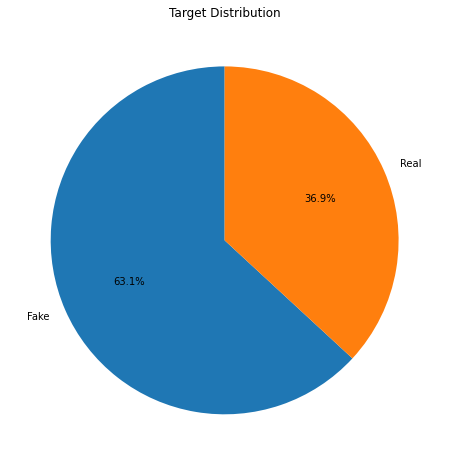

In [5]:
# Calculate the distribution of the 'label' column
label_counts = df['label'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Target Distribution')
plt.show()

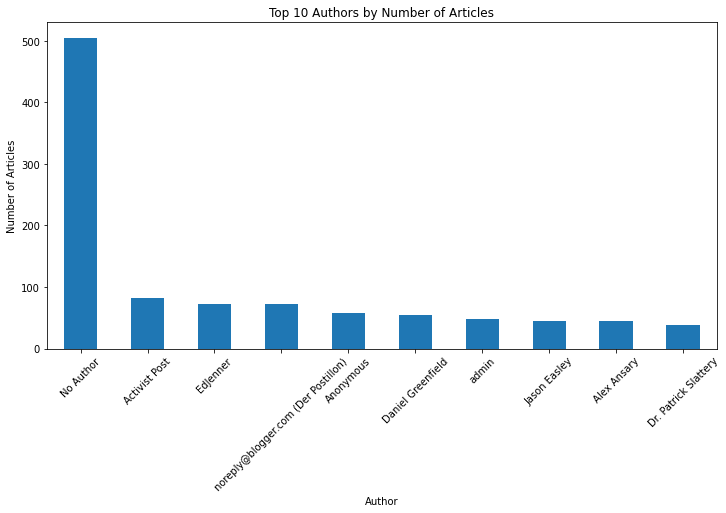

In [6]:
# Bar Chart: Distribution of articles by author
author_counts = df['author'].value_counts().head(10)
plt.figure(figsize=(12, 6))
author_counts.plot(kind='bar')
plt.title('Top 10 Authors by Number of Articles')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

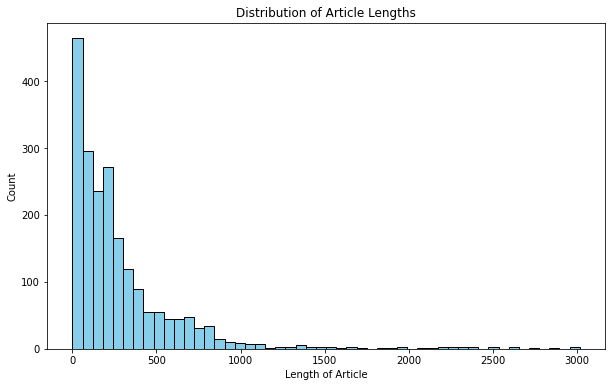

In [7]:
article_lengths = df['text_without_stopwords'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
plt.hist(article_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Article Lengths')
plt.xlabel('Length of Article')
plt.ylabel('Count')
plt.show()


In [8]:
X = df['text_without_stopwords']
y = df['label']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [11]:
# Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_vect, y_train)
lr_pred = lr_model.predict(X_test_vect)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.7214983713355049
              precision    recall  f1-score   support

        Fake       0.72      0.94      0.82       405
        Real       0.72      0.30      0.42       209

    accuracy                           0.72       614
   macro avg       0.72      0.62      0.62       614
weighted avg       0.72      0.72      0.68       614



In [12]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

In [13]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1)

In [14]:
grid_search.fit(X_train_vect, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/lo

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [15]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}


In [17]:
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
lr_pred_encoded = le.transform(lr_pred)

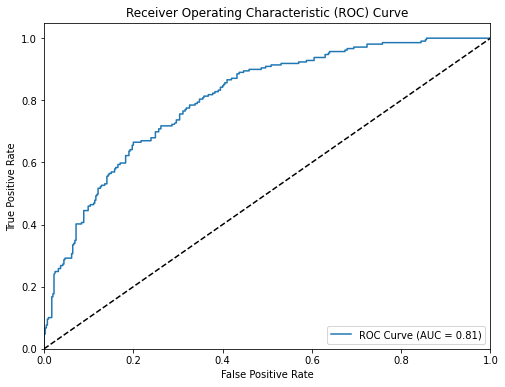

In [19]:
lr_probs = lr_model.predict_proba(X_test_vect)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_encoded,lr_model.predict_proba(X_test_vect)[:,1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test_encoded,lr_model.predict_proba(X_test_vect)[:,1])))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Random Forest

In [88]:
#random.seed(731)
#num_trees = [500, 1000, 2000]  # hyperparameters to test
#skf = StratifiedKFold(n_splits=5, shuffle=True)  # 5-fold
#for param in num_trees:
    #error = []
   # for train_index, test_index in skf.split(df['text_without_stopwords'], df['label']):
       # X_train, X_test = df.iloc[train_index]['text_without_stopwords'], df.iloc[test_index]['text_without_stopwords']
        #y_train, y_test = df.iloc[train_index]['label'], df.iloc[test_index]['label']

        # Vectorize the text data
       # X_train_vect = vectorizer.transform(X_train)
        #X_test_vect = vectorizer.transform(X_test)

        # Initialize Random Forest model
       # rf_mod = RandomForestClassifier(n_estimators=param)

       # rf_mod.fit(X_train_vect, y_train)

        # Make predictions
       # y_pred = rf_mod.predict(X_test_vect)

        # Calculate accuracy and append to error list
       # error.append(accuracy_score(y_test, y_pred))

    # Calculate and print average accuracy for current hyperparameter
   # print("Average Accuracy:", np.mean(error), "with", param, "trees") 


Average Accuracy: 0.7662591687041566 with 500 trees
Average Accuracy: 0.767726161369193 with 1000 trees
Average Accuracy: 0.7731051344743276 with 2000 trees


In [25]:

X = df['text_without_stopwords']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer(max_features=8000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

y_pred = rf_model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7866449511400652
Classification Report:
              precision    recall  f1-score   support

        Fake       0.79      0.92      0.85       405
        Real       0.77      0.53      0.63       209

    accuracy                           0.79       614
   macro avg       0.78      0.72      0.74       614
weighted avg       0.78      0.79      0.77       614

Confusion Matrix:
[[373  32]
 [ 99 110]]


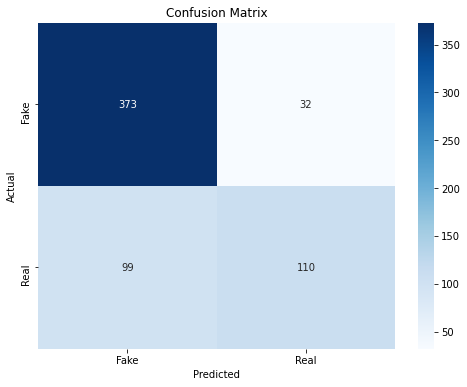

In [135]:
# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [120]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3, random_state=42)

# Create a pipeline with TfidfVectorizer and RandomForestClassifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

# Define the parameters to search
param_grid = {
    'tfidf__max_features': [5000, 10000, None],
    'rf__n_estimators': [100, 200, 500],
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the model on the test set
test_score = grid_search.score(X_test, y_test)
print("Test Score:", test_score)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'rf__n_estimators': 500, 'tfidf__max_features': 5000}
Best Score: 0.7484564216271534
Test Score: 0.7915309446254072


# Adding more Features


In [25]:
# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenization of the text
    tokens = nltk.word_tokenize(text.lower())
    # Remove punctuation and stop words, and lemmatize the tokens
    processed_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(processed_tokens)

df['text_processed'] = df['text'].apply(preprocess_text)

# Additional features
df['title_processed'] = df['title'].apply(preprocess_text)
df['num_words'] = df['text_processed'].apply(lambda x: len(x.split()))
df['num_unique_words'] = df['text_processed'].apply(lambda x: len(set(x.split())))
df['num_chars'] = df['text_processed'].apply(lambda x: len(x))

# Splitting the data again with the additional features
X = df[['text_processed', 'title_processed', 'num_words', 'num_unique_words', 'num_chars',]]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building a pipeline for text processing and classifier
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=8000)),
    ('clf', RandomForestClassifier(random_state=42))
])

# Defining a parameter grid for GridSearchCV
param_grid = {
    'tfidf__max_features': [5000, 10000, None],
    'clf': [RandomForestClassifier(random_state=42), LogisticRegression(max_iter=1000), SVC(), MultinomialNB()]
}

# Performing grid search with 5-fold cross-validation
grid_search = GridSearchCV(text_clf, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train['text_processed'], y_train)

# Get the best model and parameters
best_text_clf = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the best model on the test set
y_pred = best_text_clf.predict(X_test['text_processed'])
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'clf': RandomForestClassifier(random_state=42), 'tfidf__max_features': None}
Accuracy: 0.7768729641693811
Precision: 0.7727944381708157
Recall: 0.7768729641693811
F1 Score: 0.7651253435519595


# Conclusion

Both models show promise in classifying misinformation, with the random forest model performing slightly better.

#### Logistic Regression:

Accuracy: 72.6%
Precision and recall are better for the "Fake" class compared to the "Real" class, indicating that the model is better at identifying fake news but struggles with recall for real news.
F1-score is higher for the "Fake" class, indicating a better balance between precision and recall for fake news classification.
Overall, the logistic regression model shows moderate performance but could benefit from improvement, especially in recall for the "Real" class.

#### Random Forest:

Accuracy: 78.7%
Precision and recall are reasonably balanced for both classes, with slightly better performance for the "Fake" class.
F1-score is higher for the "Fake" class, indicating a better balance between precision and recall compared to logistic regression.
The random forest model outperforms logistic regression in terms of accuracy and F1-score.

# References
Liu, Y., & Wu, Y.-F. (2018). Early Detection of Fake News on Social Media Through Propagation Path
Classification with Recurrent and Convolutional Networks. Proceedings of the AAAI Conference on
Artificial Intelligence, 32(1). https://doi.org/10.1609/aaai.v32i1.11268

Aldwairi, M. & Alwahedi, A. (2018). Detecting fake news in social media networks.
Procedia Computer Science, 141, 215–222. https://doi.org/10.1016/j.procs.2018.10.171